In [1]:
#pip install spacy_transformers

In [2]:
#!python -m spacy download en_core_web_trf

In [3]:
#!python -m spacy download en_core_web_sm
!pip install --upgrade lightgbm

In [4]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import spacy_transformers
import multiprocessing
from sklearn.pipeline import Pipeline
import xgboost as xgb
from collections import Counter

from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

import ast
from sklearn.preprocessing import MultiLabelBinarizer

from itertools import product


C:\Users\adria\anaconda3\envs\mi_entorno_virtual\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\adria\anaconda3\envs\mi_entorno_virtual\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [6]:
print(dataTraining.head())

      year                      title  \
3107  2003                       Most   
900   2008  How to Be a Serial Killer   
6724  1941             A Woman's Face   
4704  1954            Executive Suite   
2582  1990              Narrow Margin   

                                                   plot  \
3107  most is the story of a single father who takes...   
900   a serial killer decides to teach the secrets o...   
6724  in sweden ,  a female blackmailer with a disfi...   
4704  in a friday afternoon in new york ,  the presi...   
2582  in los angeles ,  the editor of a publishing h...   

                                  genres  rating  
3107                  ['Short', 'Drama']     8.0  
900        ['Comedy', 'Crime', 'Horror']     5.6  
6724  ['Drama', 'Film-Noir', 'Thriller']     7.2  
4704                           ['Drama']     7.4  
2582     ['Action', 'Crime', 'Thriller']     6.6  


In [7]:
print(dataTraining.describe())

              year       rating
count  7895.000000  7895.000000
mean   1989.726409     6.402812
std      22.660717     1.078260
min    1894.000000     1.200000
25%    1980.000000     5.800000
50%    1997.000000     6.500000
75%    2007.000000     7.200000
max    2015.000000     9.300000


In [8]:
print(dataTraining.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 370.1+ KB
None


In [9]:
print(dataTraining.isnull().sum())

year      0
title     0
plot      0
genres    0
rating    0
dtype: int64


In [10]:
dataTraining['genres'].value_counts()


['Drama']                                                             429
['Comedy']                                                            368
['Comedy', 'Drama', 'Romance']                                        306
['Comedy', 'Romance']                                                 291
['Comedy', 'Drama']                                                   287
                                                                     ... 
['Action', 'Adventure', 'Comedy', 'Fantasy', 'Thriller']                1
['Action', 'Adventure', 'Crime', 'Drama', 'Sci-Fi']                     1
['Drama', 'Action', 'Crime']                                            1
['Biography', 'Comedy', 'Crime', 'Drama', 'Romance']                    1
['Animation', 'Adventure', 'Drama', 'Family', 'Fantasy', 'Sci-Fi']      1
Name: genres, Length: 1336, dtype: int64

C:\Users\adria\AppData\Local\Temp\ipykernel_18736\1254187909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres, y=top_genres.index, palette='viridis')


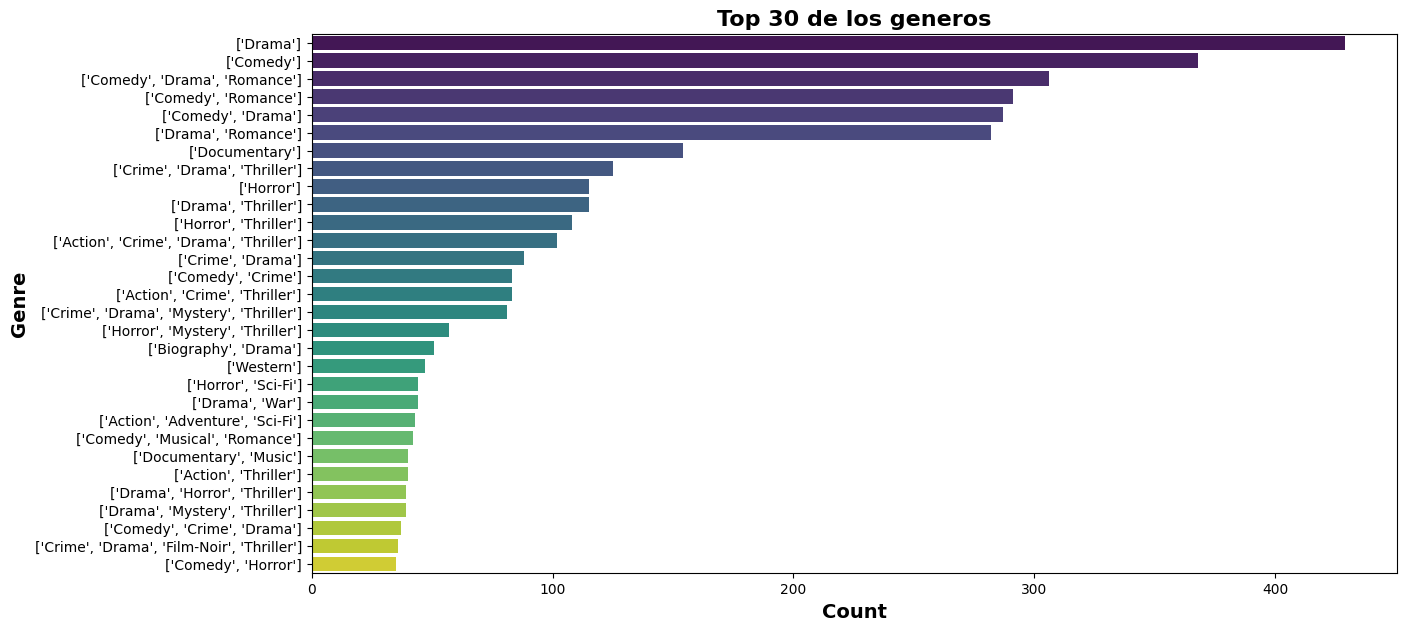

In [11]:
top_genres = dataTraining['genres'].value_counts().nlargest(30)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_genres, y=top_genres.index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Top 30 de los generos', fontsize=16, fontweight='bold')
plt.show()

In [12]:
dataTraining['plot'][0]

"major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Palabras mas usadas

In [14]:
# Combina todos los textos en una sola cadena
text_combined = ' '.join(dataTraining['plot'])

# Tokeniza el texto en palabras y convierte a minúsculas
words = [word.lower() for word in nltk.word_tokenize(text_combined)]

# Elimina las palabras vacías (stop words) en inglés
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Cuenta la frecuencia de cada palabra
word_counts = Counter(filtered_words)

# Muestra las 50 palabras más comunes
for word, count in word_counts.most_common(50):
    print(f'{word}: {count}')

,: 57327
.: 46614
': 15571
-: 10466
``: 4776
n: 3832
one: 3010
life: 2721
new: 2255
(: 2072
): 2059
man: 1927
two: 1728
get: 1713
family: 1599
love: 1530
find: 1457
father: 1454
time: 1433
young: 1356
also: 1311
old: 1249
finds: 1243
world: 1211
back: 1210
;: 1202
years: 1201
friend: 1189
wife: 1173
?: 1136
:: 1112
home: 1057
wants: 1044
way: 1040
mother: 1033
help: 1024
friends: 1001
go: 989
school: 986
however: 985
make: 961
house: 948
day: 940
first: 929
woman: 924
lives: 916
story: 911
son: 903
town: 900
soon: 892


### Extraer genero a genero

In [15]:
unique_genres = set()

# Iterar por cada fila para extraer los diferentes géneros.
for genres_string in dataTraining['genres'][:3]:
    genres_list = eval(genres_string)  # Evalúa la expresión para convertir la cadena a una lista de géneros
    unique_genres.update(genres_list)

unique_genres = set(genre for genres_string in dataTraining['genres'][:3] for genre in eval(genres_string))

print(sorted(unique_genres))


['Comedy', 'Crime', 'Drama', 'Film-Noir', 'Horror', 'Short', 'Thriller']


### Procesamiento del texto

In [16]:
dataTraining['genres'] = dataTraining['genres'].map(ast.literal_eval)

matriz = MultiLabelBinarizer()

# Vectoriza los géneros del conjunto de entrenamiento
y = matriz.fit_transform(dataTraining['genres'])

#Lematizador
lematizador = WordNetLemmatizer()
#Stemming
stemming = PorterStemmer()
stemmingsnow = SnowballStemmer('english')

#Modelo en ingles de spacy
nlp = spacy.load("en_core_web_sm")

#Añadir stopwords adicionales que se consideren necesarios
stopwords_adicionales = ["is", "the","huw","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
stopwords_en.extend(stopwords_adicionales)

In [17]:
def eliminar_nombres(text):
    doc = nlp(text)

    # Filtrar palabras que son nombres propios, personas, numeros ordinales y cardinales
    filtro = [token.text for token in doc if not token.ent_type_ in ('PERSON')]
    
    text = ' '.join(filtro)

    return text

In [18]:
def preprocesamiento(text):
    # Convertir todo a lowercase
    text = text.str.lower()
    
    # Eliminar stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_en]))
    
    # Quitar caracteres que no sean letras (Se eliminan caracteres especiales y números)
    text = text.apply(lambda x: ' '.join([re.sub(r'[^a-zA-Z]', '', word) for word in x.split()]))
    
    # Quitar espacios en blanco
    text = text.apply(lambda x: ' '.join(x.split()))
    
    # Lematización
    text = text.apply(lambda x: ' '.join([lematizador.lemmatize(word) for word in x.split()]))
    
    # Stemming (usando Porter Stemmer)
    text = text.apply(lambda x: ' '.join([stemming.stem(word) for word in x.split()]))

    return text

dataTraining['plot'] = preprocesamiento(dataTraining['plot'])


### Modelos

#### XGBoost

In [19]:
#Vector
vectxg = CountVectorizer(min_df=3,binary = True)
X = vectxg.fit_transform(dataTraining['plot'])
X.shape

(7895, 11019)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1306)

In [21]:
insumo_modelos=['Modelo','Arboles','Profundidad','Learning_Rate','AUC_Train','AUC_Test']
results=pd.DataFrame(columns=insumo_modelos)

In [22]:
# Parámetros/Factores Fijos 
min_child_weight_fx = 1 #valores altos se usan para conjuntos de datos desquilibrados o con ruido
reg_lambda_fx = 5 # Valores más altos proporcionan más regularización.
subsample_fx = 0.8 #Un valor más bajo puede mejorar la generalización.

# Parámetros/Factores Variables
n_estimators = [150] #Numero de estimadores
max_depth = [11] 
learning_rate = [0.1] 

# Configuración de hiperparámetros
hyperparameters = {
    'min_child_weight': min_child_weight_fx,
    'reg_lambda': reg_lambda_fx,
    'subsample': subsample_fx,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate
}

# Imprimir los hiperparámetros para referencia
print("Hiperparámetros:")
for key, value in hyperparameters.items():
    print(f'{key}: {value}')

Hiperparámetros:
min_child_weight: 1
reg_lambda: 5
subsample: 0.8
n_estimators: [150]
max_depth: [11]
learning_rate: [0.1]


In [23]:
np.random.seed(1306)

results_list = []

# Iterar sobre todas las combinaciones de hiperparámetros
for es, dp, lr in product(n_estimators, max_depth, learning_rate):
    # Modelo
    model_exp = xgb.XGBClassifier(
        booster='gbtree', max_depth=dp, learning_rate=lr,
        n_estimators=es, min_child_weight=min_child_weight_fx,
        subsample=subsample_fx, reg_lambda=reg_lambda_fx
    )

    # Entrenamiento
    model_exp.fit(X_train, y_train)

    # Predicción sobre Train
    y_train_pred = model_exp.predict_proba(X_train)
    # Predicción sobre Test
    y_test_pred = model_exp.predict_proba(X_test)

    # AUC Train
    AUC_train= roc_auc_score(y_train, y_train_pred, average='macro')
    # AUC Test
    AUC_test= roc_auc_score(y_test, y_test_pred, average='macro')

    # Almacenar en la lista de resultados
    results_list.append(['XGBoost', es, dp, lr, AUC_train, AUC_test])

# Convertir la lista de resultados a DataFrame
results = pd.DataFrame(results_list, columns=insumo_modelos)

# Imprimir resultados finales si es necesario
print(results)

    Modelo  Arboles  Profundidad  Learning_Rate  AUC_Train  AUC_Test
0  XGBoost      150           11            0.1   0.990584  0.860095


#### Regresion logistica

In [26]:
vectrl = TfidfVectorizer(binary = True) 
X_dtmrl= vectrl.fit_transform(dataTraining['plot']) #Vector
X_dtmrl.shape

(7895, 26893)

In [45]:
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_dtmrl, y, test_size=0.25, random_state=1306)

In [46]:
modelo_reglog = LogisticRegression(n_jobs=-1, C=0.01, multi_class='multinomial', solver='lbfgs')

clf_lr_tfidf_preproc = OneVsRestClassifier(modelo_reglog)
clf_lr_tfidf_preproc.fit(X_train_rl, y_train_rl)

OneVsRestClassifier(estimator=LogisticRegression(C=0.01,
                                                 multi_class='multinomial',
                                                 n_jobs=-1))

In [47]:
y_pred_test_rl = clf_lr_tfidf_preproc.predict_proba(X_test_rl)

In [49]:
AUC_test = roc_auc_score(y_test_rl, y_pred_test_rl, average='macro')
round(AUC_test,2)

0.89

In [51]:
y_pred_train_rl = clf_lr_tfidf_preproc.predict_proba(X_train_rl)

In [52]:
AUC_train = roc_auc_score(y_train_rl, y_pred_train_rl, average='macro')
round(AUC_train,2)

0.96